### Data Exploration 

#### Lets import the necessary libs and load the dataset

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import model and fit

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#### Reading Data

In [11]:
df = pd.read_csv("kc_house_data.csv")

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [14]:
df.shape

(21613, 21)

In [15]:
df_train,df_test=train_test_split(df, test_size=.2, random_state=10)

In [16]:
df_train.shape

(17290, 21)

In [17]:
df_test.shape

(4323, 21)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 15949 to 17673
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  lo

there is Object type in date should be Numeric! we will drop it later

In [19]:
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.586337e+09,5.402433e+05,3.372701,2.115862,2080.230943,1.496649e+04,1.491151,0.007634,0.235396,3.413245,7.664488,1786.008444,294.222499,1970.898207,85.990573,98077.765934,47.560626,-122.213218,1989.023250,12795.067206
std,2.874865e+09,3.632544e+05,0.935922,0.771611,915.601503,3.954196e+04,0.538696,0.087044,0.767490,0.653362,1.173943,825.928205,443.879716,29.362130,405.259081,53.437100,0.138192,0.140959,689.034165,27379.350862
min,1.000102e+06,7.500000e+04,0.000000,0.000000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,620.000000,651.000000
25%,2.124049e+09,3.200000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471925,-122.327000,1490.000000,5100.000000
50%,3.905040e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572800,-122.229000,1840.000000,7620.000000
75%,7.308600e+09,6.469500e+05,4.000000,2.500000,2550.000000,1.072300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,570.000000,1996.000000,0.000000,98117.000000,47.678400,-122.124000,2360.000000,10125.000000
max,9.900000e+09,6.885000e+06,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Preprocessing

####  Drop unnecessary columns

In [20]:
df_train.drop(['date','floors'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Check if there is any missing value and sum them

In [21]:
# simple cleaning
df_train = df_train.replace('?', np.NaN).dropna().reset_index()
df_train.isna().sum()

index            0
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

there is NO missing value

#### Check if there is any duplicated

In [22]:
df_train.duplicated().sum()

0

So, NO duplicated

In [23]:
df_train.columns

Index(['index', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Rename the columns to be more readable

In [24]:
df_train.rename(columns={'yr_built':'year_built', 'yr_renovated':'year_renovated','lat':'latitude','long':'longitude'},inplace=True)
df_train.head()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15
0,15949,3223049073,235000.0,2,1.00,930,10505,0,0,3,6,930,0,1930,0,98148,47.4337,-122.329,1520,8881
1,16409,7231600098,225000.0,2,1.00,700,6000,0,0,3,6,700,0,1943,0,98055,47.4671,-122.212,1320,6000
2,14668,6003500995,729000.0,3,1.00,1580,3840,0,0,3,8,1580,0,1908,0,98102,47.6192,-122.319,1680,2624
3,6877,9406520290,305000.0,3,2.25,1646,12414,0,0,3,7,1646,0,1996,0,98038,47.3630,-122.035,1654,8734
4,20213,9358001403,380000.0,3,3.25,1450,1468,0,0,3,8,1100,350,2009,0,98126,47.5664,-122.370,1450,1478


#### Check the types of feature

In [25]:
df_train.dtypes

index               int64
id                  int64
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
year_built          int64
year_renovated      int64
zipcode             int64
latitude          float64
longitude         float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

### Data Visualization

#### ID Vs Price

Unique ID for each home sold

In [26]:
id_vs_price = df_train[["id","price"]].copy()
id_vs_price

,id,price
0,3223049073,235000.0
1,7231600098,225000.0
2,6003500995,729000.0
3,9406520290,305000.0
4,9358001403,380000.0
...,...,...
17285,6386700110,245000.0
17286,4058200630,353000.0
17287,2207100165,475000.0
17288,4178500440,279900.0


In [27]:
norm = MinMaxScaler()
id_vs_price["id"] = norm.fit_transform(id_vs_price[["id"]])

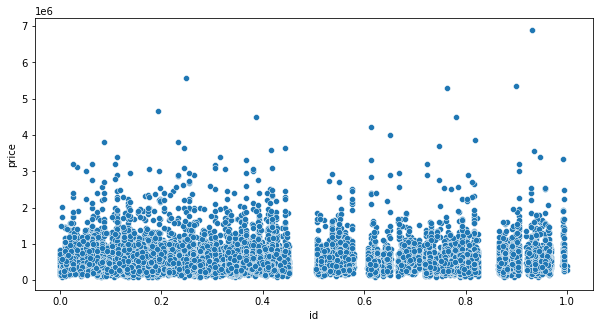

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=id_vs_price, x="id", y="price");

In [29]:
id_vs_price.corr()

,id,price
id,1.000000,-0.013927
price,-0.013927,1.000000


From the above we can see id and price is not having a good relationship, So we can ignore that.

#### Bedrooms Vs Price

In [30]:
# Range of Bedrooms values
df_train.bedrooms.unique()

array([ 2,  3,  4,  5,  6,  7,  1,  0,  8,  9, 33, 10, 11])

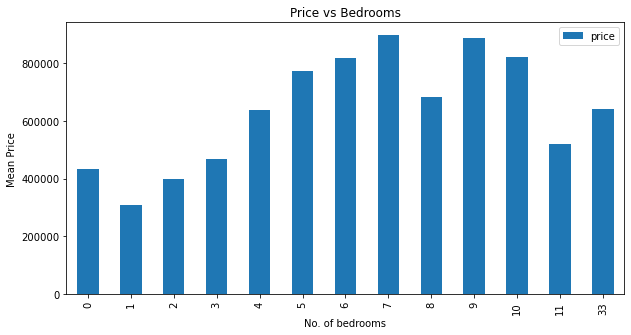

In [31]:
plt.figure(figsize=(10,5))
df_train.groupby('bedrooms').price.mean().plot(kind='bar')
plt.xlabel("No. of bedrooms")
plt.ylabel("Mean Price")
plt.title("Price vs Bedrooms")
plt.legend();

From the above plot, we can see that 
mean price of a house with bedrooms in the range 1-7 its increasing 

In [32]:
df_train[['bedrooms','price']].corr()

,bedrooms,price
bedrooms,1.000000,0.302944
price,0.302944,1.000000


#### SqftLiving Vs Price

Square footage of the apartments interior living space

In [33]:
sqft_srs = df_train[['sqft_living','price']].sort_values(by='sqft_living')

In [34]:
sqft_df = sqft_srs.reset_index().drop('index',axis=1)

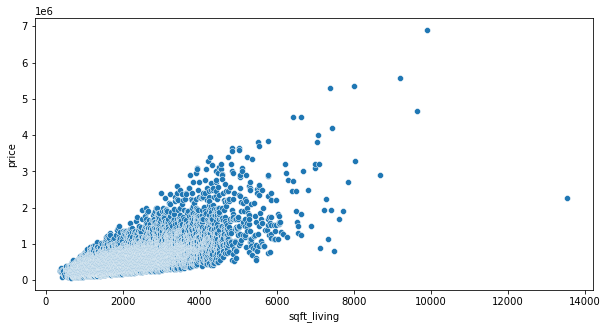

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sqft_df, x="sqft_living", y="price");

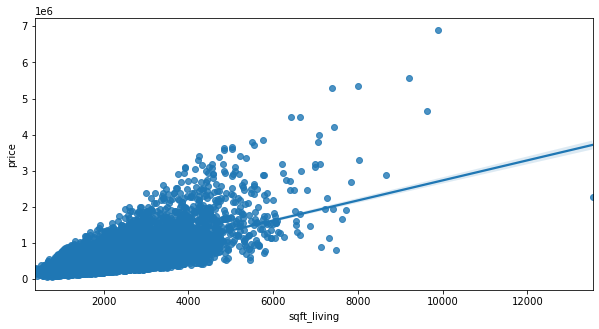

In [36]:
plt.figure(figsize=(10,5))
sns.regplot(x="sqft_living", y="price", data=sqft_df);

In [37]:
sqft_df.corr()

,sqft_living,price
sqft_living,1.000000,0.699111
price,0.699111,1.000000



Nice corealtion is existing between sqft_living and price (0.70)

#### Price vs SqftLot

 Square footage of the land space

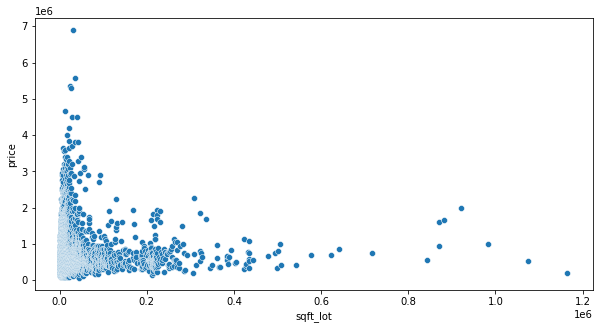

In [38]:
plt.figure(figsize=(10,5))
sqft_srs =df_train[['sqft_lot','price']].sort_values(by='sqft_lot')
sqft_df = sqft_srs.reset_index().drop('index',axis=1)
sns.scatterplot(data=sqft_df, x="sqft_lot", y="price");

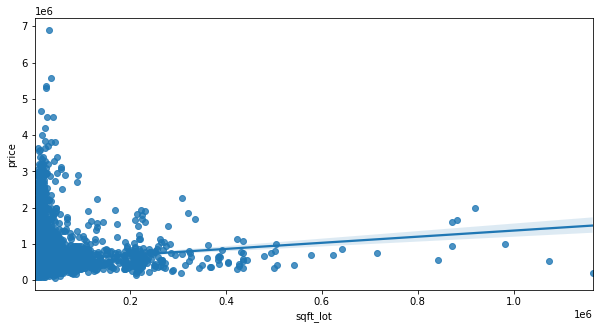

In [39]:
plt.figure(figsize=(10,5))
sns.regplot(x="sqft_lot", y="price", data=sqft_df);

In [40]:
sqft_df.corr()

,sqft_lot,price
sqft_lot,1.000000,0.091601
price,0.091601,1.000000


Its having lower corelation, so we can ignore it.

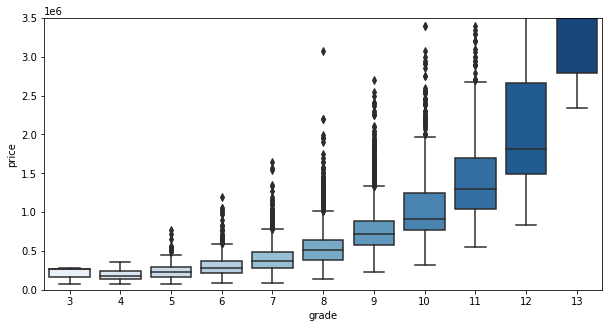

In [89]:
var = 'grade'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f,ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y="price", data=data, palette='Blues')
fig.axis(ymin=0, ymax=3500000)
plt.show();

Clearly, as the features "grade" increase, so does the Price.

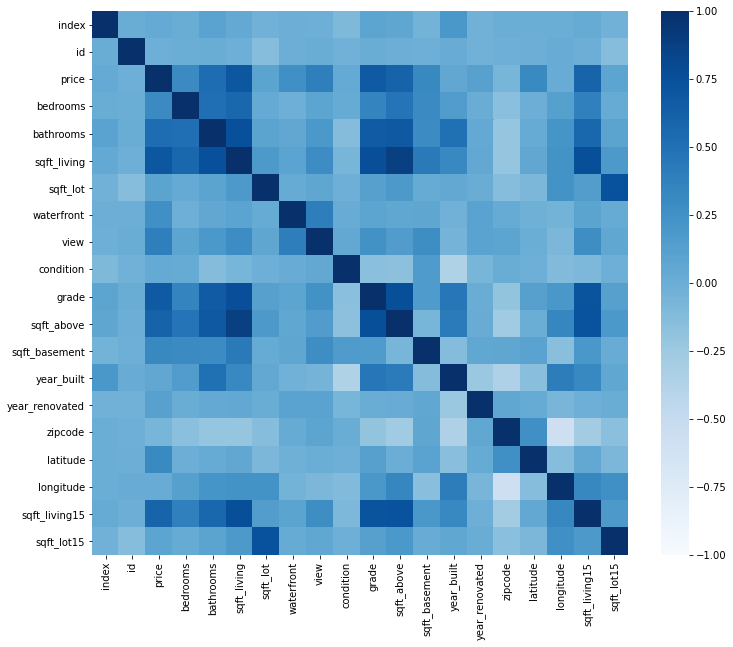

In [78]:
correlation = df_train.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation, linewidths=0, vmin=-1, cmap="Blues")

C:\Users\samia\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


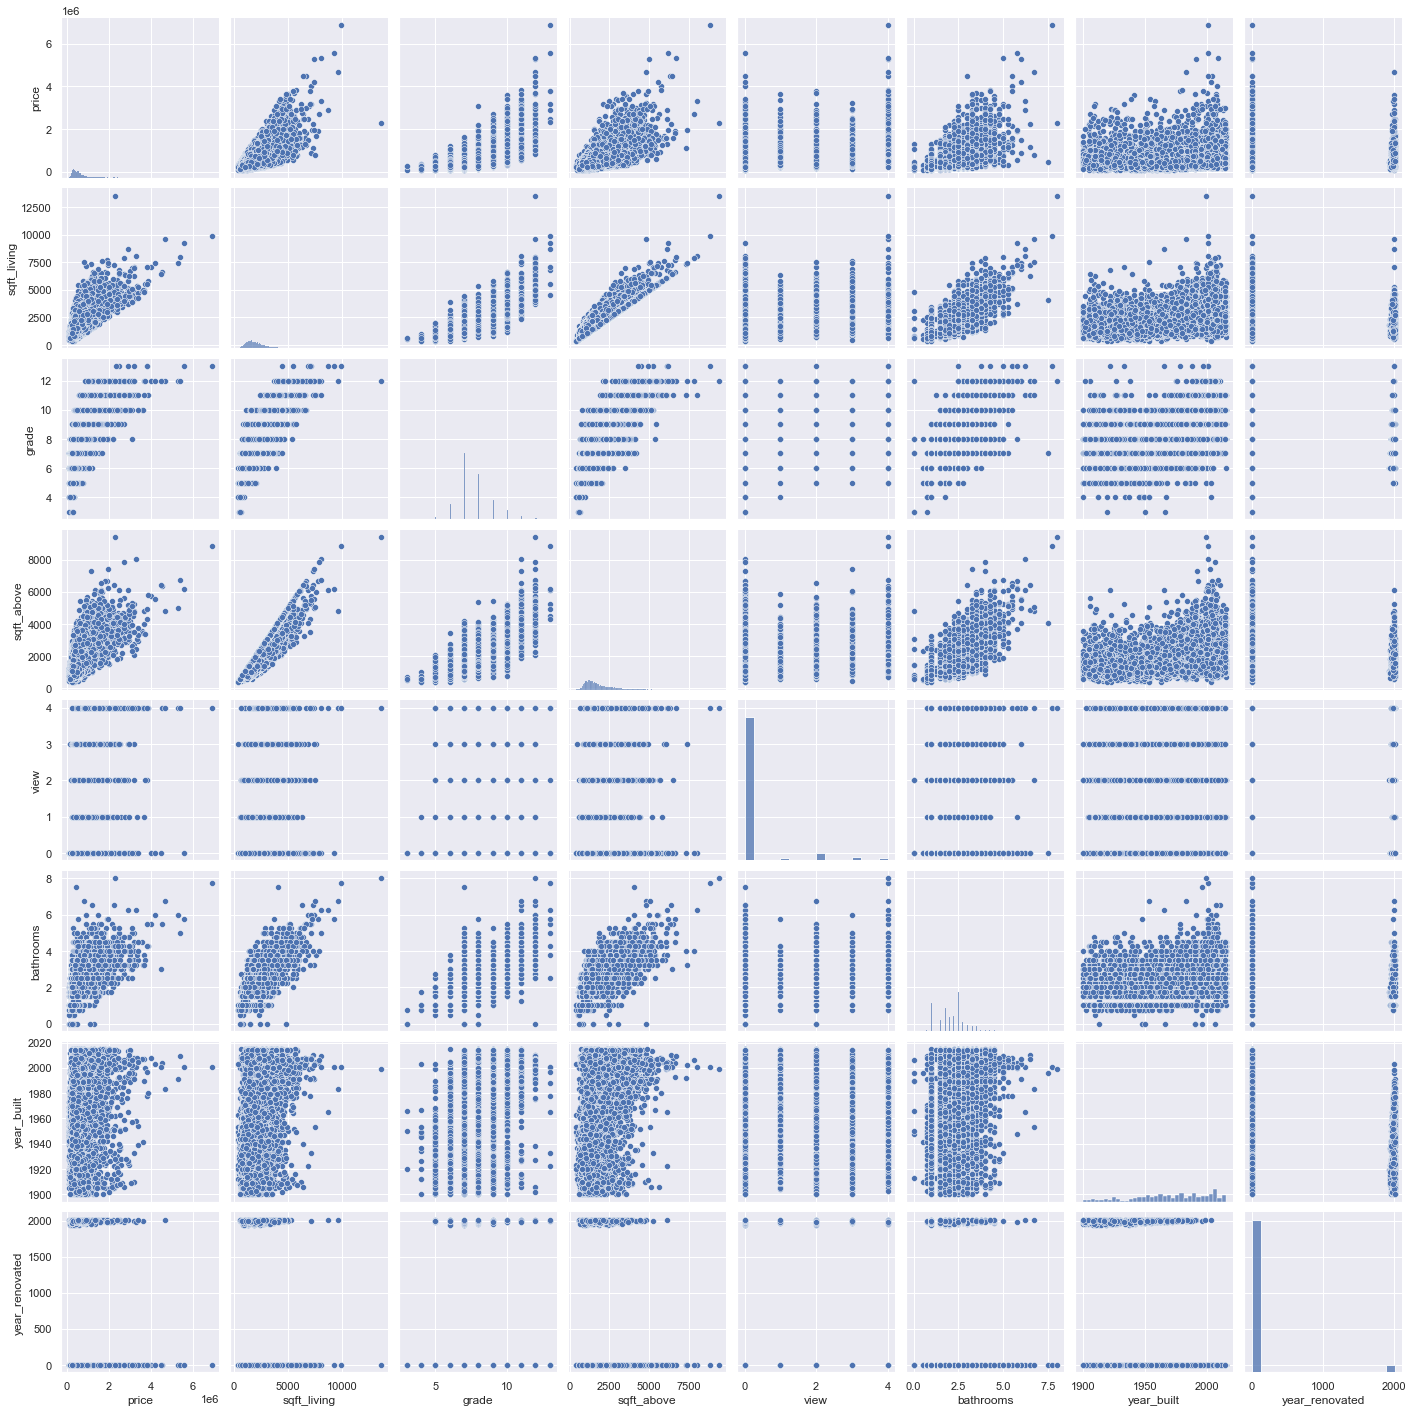

In [305]:
#scatterplot
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','year_built','year_renovated']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

These overall scatterplots confirm the findings of the heatmap. There is myriad of linear correlation between sqft_living, sqft_above, bathrooms, grade. 
This yields an opportunity for to combine features. Moreover, what we learned that the above mentioned features have the biggest impact on sale price. One would also expect location to play a role, but as they are in latitude/longitude coordinates, it requires advanced data manipulation to take it into account. Finally, due to many linear relationships we can apply regression models.

### Model

In [96]:
x, y = df_train.drop('price',axis=1), df_train['price']

x, x_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
x, y = np.array(x), np.array(y)

In [97]:
lm = LinearRegression()

cross_val_score(lm, x, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.69666862, 0.69794372, 0.70181079, 0.701232  , 0.69020655])

In [98]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, x, y, cv=kf, scoring='r2')

array([0.69617991, 0.67191758, 0.70490457, 0.70551804, 0.7092144 ])

In [99]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, x, y, cv=kf, scoring='r2')))


0.6971341206506538


In [100]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_test_scaled = scaler.transform(x_test)

lm = Ridge(alpha=1)
lm.fit(x_scaled,y)
print(f'Ridge Regression test R^2: {lm.score(x_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.694


after Ridge conversion , nothing has changed

In [101]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [102]:
x_pr = pr.fit_transform(x)

In [103]:
x_train_pr, x_test_pr, y_train, y_test = train_test_split(x_pr, y, test_size=0.30, random_state=42)

In [104]:
lr = LinearRegression()
lr.fit(x_train_pr,y_train)
lr.score(x_train_pr, y_train)

0.7212408876707372

after polynomial conversion accuracy had improved

In [105]:
preds = lm.predict(x)

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

In [107]:
print(rmse)
print(mae)

13201573880545.17
11179366268861.412
